# Q8.1 Import the required libraries and Load the NLTK sample dataset
Using the NLTK, an opensource NLP library, for collecting, handling, and processing Twitter data.

In [1]:
import nltk                                  # Python library for NLP
from nltk.corpus import twitter_samples      # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt              # visualization library
import numpy as np                           # library for scientific computing and matrix operations

In [2]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

Import some helper functions provided in the utils.py file:

1. process_tweet(): Cleans the text, tokenizes it into separate words, removes stopwords, and converts words to stems.
2. build_freqs(): This counts how often a word in the 'corpus' (the entire set of tweets) was associated with a positive label 1 or a negative label 0. It then builds the freqs dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.



In [3]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')

# import  convenience functions
from utils import process_tweet, build_freqs

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\urmil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load nltk sample dataset

In [4]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\urmil\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

### About the dataset 
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

We can load the text fields of the positive and negative tweets by using the module's strings() method like this:

In [5]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

Next, we'll print a report with the number of positive and negative tweets, to know the data structure of the datasets, the data is stored in a list and individual tweets are stored as strings.

In [6]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


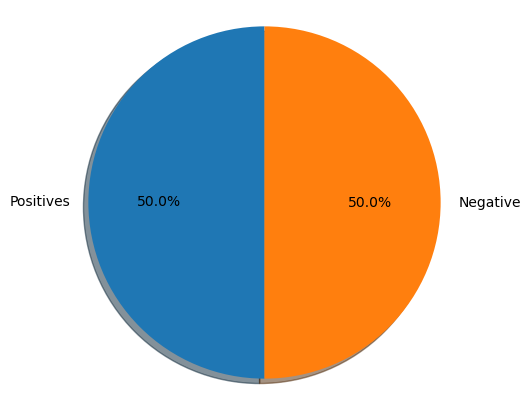

In [7]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

print one random positive and one random negative tweet. We have added a color mark at the beginning of the string to further distinguish the two.

In [8]:
# split the data into two pieces, one for training and one for testing (validation set) 
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [9]:
#combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [10]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))


train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


Create the frequency dictionary using the imported build_freqs() function.
The build_freqs() function is defined in utils.py .
    for y,tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
The freqs dictionary is the frequency dictionary that's being built.
The key is the tuple (word, label), such as ("happy",1) or ("happy",0). The value stored for each key is the count of how many times the word "happy" was associated with a positive label, or how many times "happy" was associated with a negative label.

In [11]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11337


In [12]:
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


In [13]:
import random  
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

I suspect that they travel widely before eventually returning home reaapearing in the fridge :-)) https://t.co/Sv4cWevOxi
Everything and all :(


# Preprocess raw text for Sentiment analysis

In [14]:
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


##  Remove hyperlinks, Twitter marks and styles

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the re library to perform regular expression operations on our tweet. We'll define our search pattern and use the sub() method to remove matches by substituting with an empty character (i.e. '')


In [15]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


##  Tokenize the string

To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The tokenize module from NLTK allows us to do these easily:


In [16]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


##  Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. 

In [17]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

The stop words list above contains some words that could be important in some contexts. These could be words like i, not, between, because, won, against. You might need to customize the stop words list for some applications. For our exercise, we will use the entire list.

For the punctuation, we saw earlier that certain groupings like ':)' and '...' should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed

In [18]:
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)


['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


## Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of the vocabulary,Ex:

    learn
    learning
    learned
    learnt


All these words are stemmed from its common root learn. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, happi and sunni. That's because it chooses the most common stem for related words. For example, the set of words that comprises the different forms of happy:


    happy
    happiness
    happier

We can see that the prefix happi is more commonly used. We cannot choose happ because it is the stem of unrelated words like happen.

NLTK has different modules for stemming and the PorterStemmer module which uses the Porter Stemming Algorithm.

In [19]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


## Combining the preprocessing in single step using process_tweet()

As shown above, preprocessing consists of multiple steps before you arrive at the final list of words.The function process_tweet(tweet) available in utils.py.
To obtain the same result as in the previous code cells, we can use function process_tweet().


In [20]:
from utils import process_tweet # Import the process_tweet function

# choose the same tweet
tweet = all_positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


#  Logistic regression
## The Sigmoid function
We will learn to use logistic regression for text classification. 
* The sigmoid function is defined as: 

$$ h(z) = \frac{1}{1+\exp^{-z}} \tag{1}$$

It maps the input 'z' to a value that ranges between 0 and 1, and so it can be treated as a probability. 


#### Implement the sigmoid function
* We will need this function to work if z is a scalar as well as if it is an array.

In [21]:
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return h

In [22]:
#Testing function
if (sigmoid(0) == 0.5):
    print('SUCCESS!')
else:
    print('Oops!')

if (sigmoid(4.92) == 0.9927537604041685):
    print('CORRECT!')
else:
    print('Oops again!')

SUCCESS!
CORRECT!


### Logistic regression: regression and a sigmoid

Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

Regression:
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
Note that the $\theta$ values are "weights". If we take a Deep Learning Specialization, we referred to the weights with the `w` vector.  In this, we're using a different variable $\theta$ to refer to the weights.

Logistic regression
$$ h(z) = \frac{1}{1+\exp^{-z}}$$
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
We will refer to 'z' as the 'logits'.

### Cost function and Gradient

The cost function used for logistic regression is the average of the log loss across all training examples:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))\tag{5} $$
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of the i-th training example.
* $h(z(\theta)^{(i)})$ is the model's prediction for the i-th training example.

The loss function for a single training example is
$$ Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$

* All the $h$ values are between 0 and 1, so the logs will be negative. That is the reason for the factor of -1 applied to the sum of the two loss terms.
* Note that when the model predicts 1 ($h(z(\theta)) = 1$) and the label $y$ is also 1, the loss for that training example is 0. 
* Similarly, when the model predicts 0 ($h(z(\theta)) = 0$) and the actual label is also 0, the loss for that training example is 0. 
* However, when the model prediction is close to 1 ($h(z(\theta)) = 0.9999$) and the label is 0, the second term of the log loss becomes a large negative number, which is then multiplied by the overall factor of -1 to convert it to a positive loss value. $-1 \times (1 - 0) \times log(1 - 0.9999) \approx 9.2$ The closer the model prediction gets to 1, the larger the loss.

In [23]:
# verify that when the model predicts close to 1, but the actual label is 0, the loss is a large positive value
-1 * (1 - 0) * np.log(1 - 0.9999) # loss is about 9.2

9.210340371976294

* Likewise, if the model predicts close to 0 ($h(z) = 0.0001$) but the actual label is 1, the first term in the loss function becomes a large number: $-1 \times log(0.0001) \approx 9.2$.  The closer the prediction is to zero, the larger the loss.

In [24]:
#verify that when the model predicts close to 0 but the actual label is 1, the loss is a large positive value
-1 * np.log(0.0001) # loss is about 9.2

9.210340371976182

#### Update the weights

To update weight vector $\theta$, we will apply gradient descent to iteratively improve your model's predictions.  
The gradient of the cost function $J$ with respect to one of the weights $\theta_j$ is:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x_j \tag{5}$$
* 'i' is the index across all 'm' training examples.
* 'j' is the index of the weight $\theta_j$, so $x_j$ is the feature associated with weight $\theta_j$

* To update the weight $\theta_j$, we adjust it by subtracting a fraction of the gradient determined by $\alpha$:
$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
* The learning rate $\alpha$ is a value that we choose to control how big a single update will be.


## Implement gradient descent function
* The number of iterations `num_iters` is the number of times that we'll use the entire training set.
* For each iteration, we'll calculate the cost function using all training examples (there are `m` training examples), and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $\theta_0$ (note that the corresponding feature value $\mathbf{x_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1) 
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)
* The prediction 'h', is calculated by applying the sigmoid to each element in 'z': $h(z) = sigmoid(z)$, and has dimensions (m,1).
* The cost function $J$ is calculated by taking the dot product of the vectors 'y' and 'log(h)'.  Since both 'y' and 'h' are column vectors (m,1), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* The update of theta is also vectorized.  Because the dimensions of $\mathbf{x}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{x}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

In [25]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
      print the cost to make sure that it is going down.
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # get 'm', the number of rows in matrix x
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x,theta)
        
        # get the sigmoid of h
        h = sigmoid(z)
        
        # calculate the cost function
        # note that we can use also np.array.transpose() instead of np.array.T
        # np.array.T just makes code a little more readable :)
        J = -1./m * (np.dot(y.T, np.log(h)) + np.dot((1-y).T,np.log(1-h)))                                                    

        # update the weights theta
        theta = theta - (alpha/m) * np.dot(x.T,(h-y))
        
    ### END CODE HERE ###
    J = float(J)
    return J, theta

In [26]:
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


C:\Users\urmil\AppData\Local\Temp\ipykernel_30612\2937681558.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J = float(J)


##  Extracting the features

* Given a list of tweets, extract the features and store them in a matrix. We will extract two features.
    * The first feature is the number of positive words in a tweet.
    * The second feature is the number of negative words in a tweet. 
* Then train  logistic regression classifier on these features.
* Test the classifier on a validation set. 

# Implement the extract_features function
This function takes in a single tweet. Process the tweet using the imported process_tweet() function and save the list of tweet words.Loop through each word in the list of processed words. For each word, check the freqs dictionary for the count when that word has a positive '1' label. (Check for the key (word, 1.0)Do the same for the count for when the word is associated with the negative label '0'. (Check for the key (word, 0.0).)


In [27]:
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [28]:
#check function 
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.00e+00 3.02e+03 6.10e+01]]


In [29]:
# check for when the words are not in the freqs dictionary
tmp2 = extract_features('blorb bleeeeb bloooob', freqs)
print(tmp2)

[[1. 0. 0.]]


## Training Model

To train the model:
* Stack the features for all training examples into a matrix `X`. 
* Call `gradientDescent`, which you've implemented above.

In [30]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.24215478.
The resulting vector of weights is [7e-08, 0.00052391, -0.00055517]


C:\Users\urmil\AppData\Local\Temp\ipykernel_30612\2937681558.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J = float(J)


#  Test  logistic regression

It is time for to test the logistic regression function on some new input that your model has not seen before. 

Predict whether a tweet is positive or negative.

*Given a tweet, process it, then extract the features.
*Apply the model's learned weights on the features to get the logits.
*Apply the sigmoid to the logits to get the prediction (a value between 0 and 1).
$$y_{pred} = sigmoid(\mathbf{x} \cdot \theta)$$


In [56]:
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
    
    ### END CODE HERE ###
    
    return y_pred

In [32]:
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.518581
I am bad -> 0.494339
this movie should have been great. -> 0.515331
great -> 0.515464
great great -> 0.530899
great great great -> 0.546274
great great great great -> 0.561562


C:\Users\urmil\AppData\Local\Temp\ipykernel_30612\1744738209.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))


In [33]:
# To check the sentiment of your own tweet below
my_tweet = 'I am learning :)'
predict_tweet(my_tweet, freqs, theta)

array([[0.8163691]])

### Check performance using the test set
After training the model using the training set above, check model might perform on real, unseen data, by testing it against the test set.
Given the test data and the weights of your trained model, calculate the accuracy of the logistic regression model. 
* Use the `predict_tweet()` function to make predictions on each tweet in the test set.
* If the prediction is > 0.5, set the model's classification `y_hat` to 1, otherwise set the model's classification `y_hat` to 0.
* A prediction is accurate when `y_hat` equals `test_y`.  Sum up all the instances when they are equal and divide by `m`.


In [34]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)
    ### END CODE HERE ###
    
    return accuracy

In [35]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


 # Predict with your own tweet

In [36]:
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.48139084]]
Negative sentiment


## Q8.2 Load the extracted features and Load a pretrained Logistic Regression model

In [37]:
import pandas as pd   
data = pd.read_csv('logistic_features.csv'); # Load a 3 columns csv file using pandas function
data.head(10) # Print the first three data entries

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


In [38]:
# Each feature is labeled as bias, positive and negative
X = data[['bias', 'positive', 'negative']].values # Get only the numerical values of the dataframe
Y = data['sentiment'].values; # Put in Y the corresponding labels or sentiments

print(X.shape) # Print the shape of the X part
print(X) # Print some rows of X

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


In [39]:
theta = [7e-08, 0.0005239, -0.00055517]

# Q8.3 Plot tweets in a scatter plot using their positive and negative sums.

The vector theta represents a plane that split our feature space into two parts. Samples located over that plane are considered positive, and samples located under that plane are considered negative. Remember that we have a 3D feature space, i.e., each tweet is represented as a vector comprised of three values: [bias, positive_sum, negative_sum], always having bias = 1.

If we ignore the bias term, we can plot each tweet in a cartesian plane, using positive_sum and negative_sum. In the cell below, we do precisely this. Additionally, we color each tweet, depending on its class. Positive tweets will be green and negative tweets will be red.


Text(0, 0.5, 'Negative')

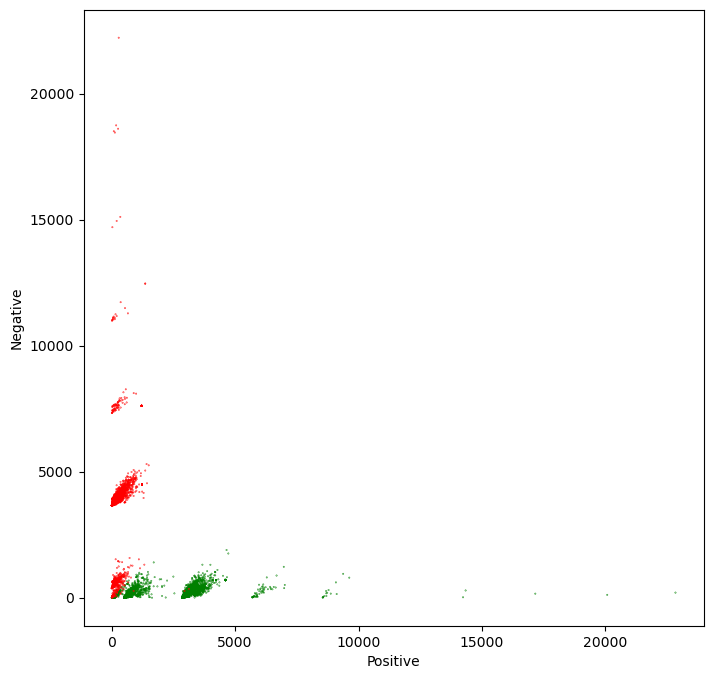

In [40]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

From the plot, it is evident that the features that we have chosen to represent tweets as numerical vectors allow an almost perfect separation between positive and negative tweets. So you can expect a very high accuracy for this model! 

# Q8.4 Plot the output of the logistic regression model in the same plot as a solid line
We will draw a gray line to show the cutoff between the positive and negative regions. In other words, the gray line marks the line where $$ z = \theta * x = 0.$$
To draw this line, we have to solve the above equation in terms of one of the independent variables.

$$ z = \theta * x = 0$$
$$ x = [1, pos, neg] $$
$$ z(\theta, x) = \theta_0+ \theta_1 * pos + \theta_2 * neg = 0 $$
$$ neg = (-\theta_0 - \theta_1 * pos) / \theta_2 $$

The red and green lines that point in the direction of the corresponding sentiment are calculated using a perpendicular line to the separation line calculated in the previous equations(neg function). It must point in the same direction as the derivative of the Logit function, but the magnitude may differ. It is only for a visual representation of the model. 

$$direction = pos * \theta_2 / \theta_1$$

In [41]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

The green line in the chart points in the direction where z > 0 and the red line points in the direction where z < 0. The direction of these lines are given by the weights theta1 and theta2

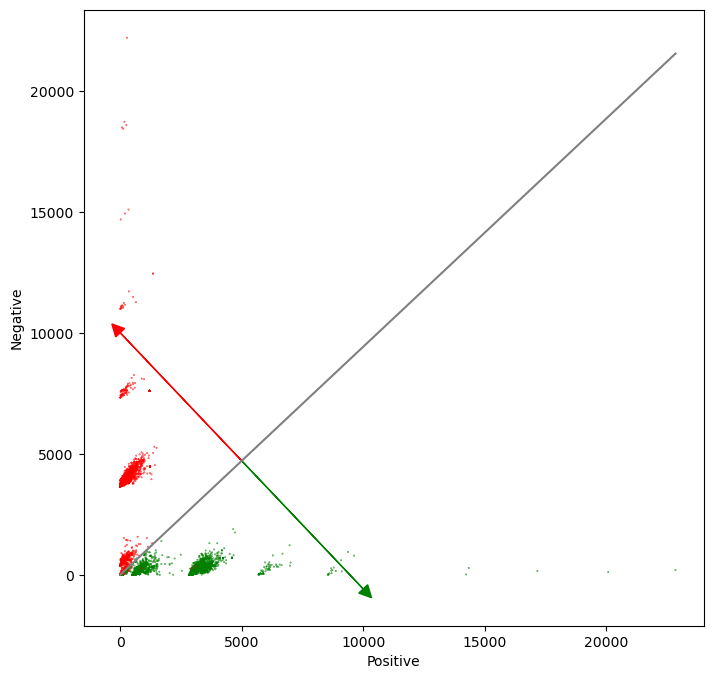

In [42]:
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()

# Sample dataset 2 and plotting confusion matrix

# Visualizing tweets and interpret the Logistic Regression model for TweetsNew dataset

In [43]:
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [44]:
def clean_tweet(tweet):
    '''
    Utility function to clean tweet text by removing links, special characters
    using simple regex statements.
    '''
    return ' '.join(re.sub(r"(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [45]:
# Function to calculate sentiment percentages
def analyze_tweet_sentiment(tweet):
    # Get sentiment
    sia = SentimentIntensityAnalyzer()
    cleaned_tweet = clean_tweet(tweet)
    sentiment = sia.polarity_scores(cleaned_tweet)

    # Calculate positive and negative percentages
    positive_percentage = sentiment['pos'] * 100
    negative_percentage = sentiment['neg'] * 100

    # Print the sentiment analysis result for the tweet
    #print(f"{tweet} +: {positive_percentage:.2f}% -: {negative_percentage:.2f}%")

    return positive_percentage, negative_percentage

In [46]:
df = pd.read_csv('TweetsNew.csv')

df.columns = ["id","Text","TrainingTweet","Sentiment"]

df['TrainingTweet'] = df['TrainingTweet'].astype(str)
df['TrainingTweet'] = df['TrainingTweet'].str.lower()

#Remove Stop words
stop = set(stopwords.words('english'))
df['TrainingTweet'] = df['TrainingTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

# Display the first few tweets
print(df.head())

           id                                               Text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

          TrainingTweet Sentiment  
0  i`d responded, going   neutral  
1              sooo sad  negative  
2              bullying  negative  
3           leave alone  negative  
4            sons ****,  negative  


In [47]:
df['Positive_Sentiment'] = df['TrainingTweet'].apply(lambda x: analyze_tweet_sentiment(x)[0])
df['Negative_Sentiment'] = df['TrainingTweet'].apply(lambda x: analyze_tweet_sentiment(x)[1])


# Define a threshold for considering a sentiment as neutral
neutral_threshold = 0.05  # You can adjust this threshold based on your needs

# Apply the function to classify tweets as Positive, Negative, or Neutral
df['TwitterSentiment'] = df.apply(
    lambda row: "Positive" if row['Positive_Sentiment'] > row['Negative_Sentiment'] + neutral_threshold else
                "Negative" if row['Negative_Sentiment'] > row['Positive_Sentiment'] + neutral_threshold else
                "Neutral", axis=1
)

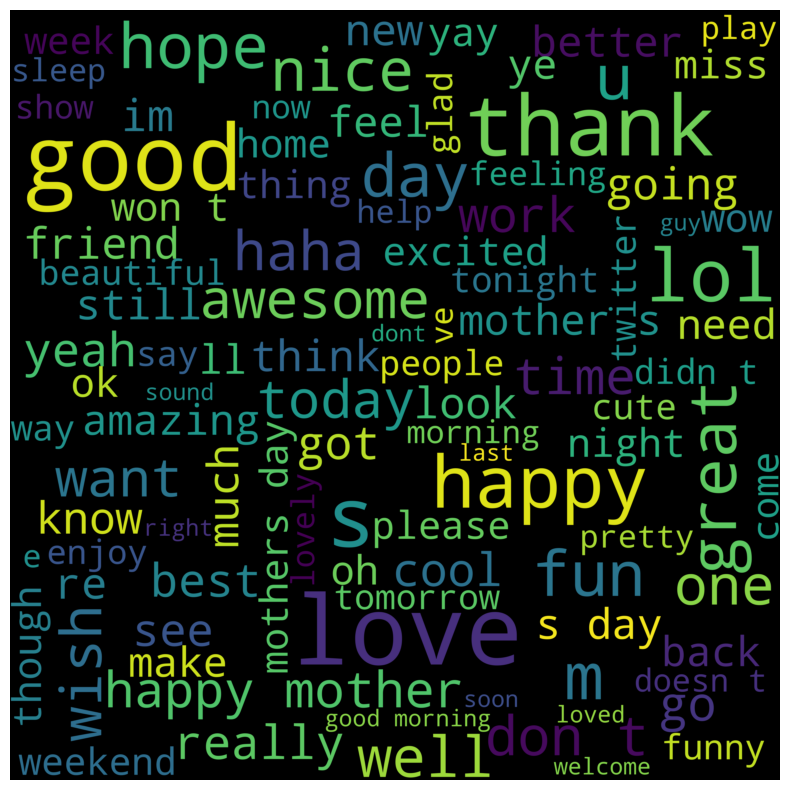

In [48]:
word_cloud_text = ' '.join(df[df["TwitterSentiment"] == "Positive"]['TrainingTweet'])
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

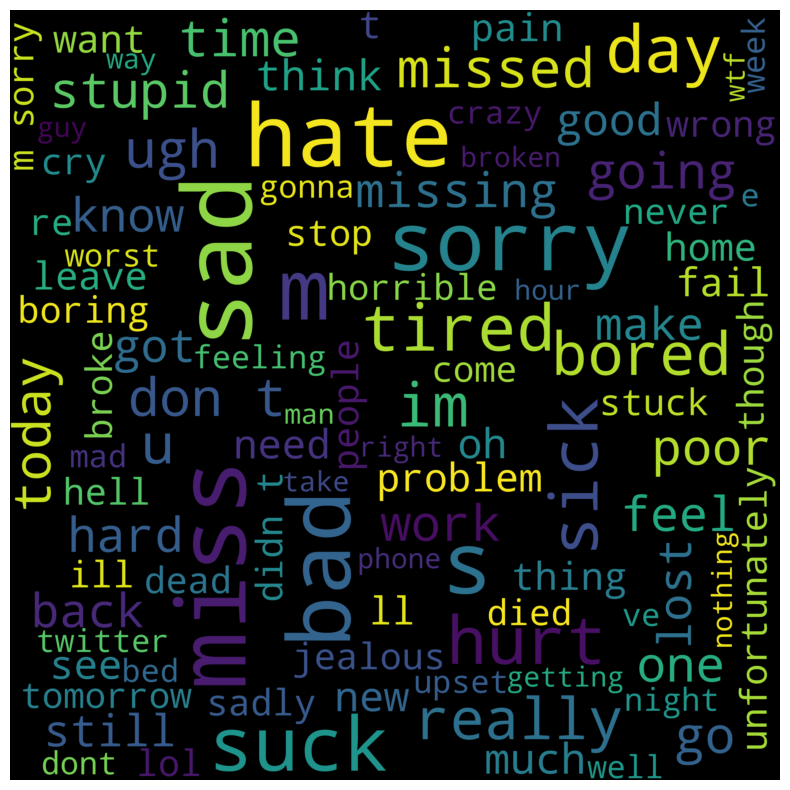

In [49]:
word_cloud_text = ' '.join(df[df["TwitterSentiment"] == "Negative"]['TrainingTweet'])
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

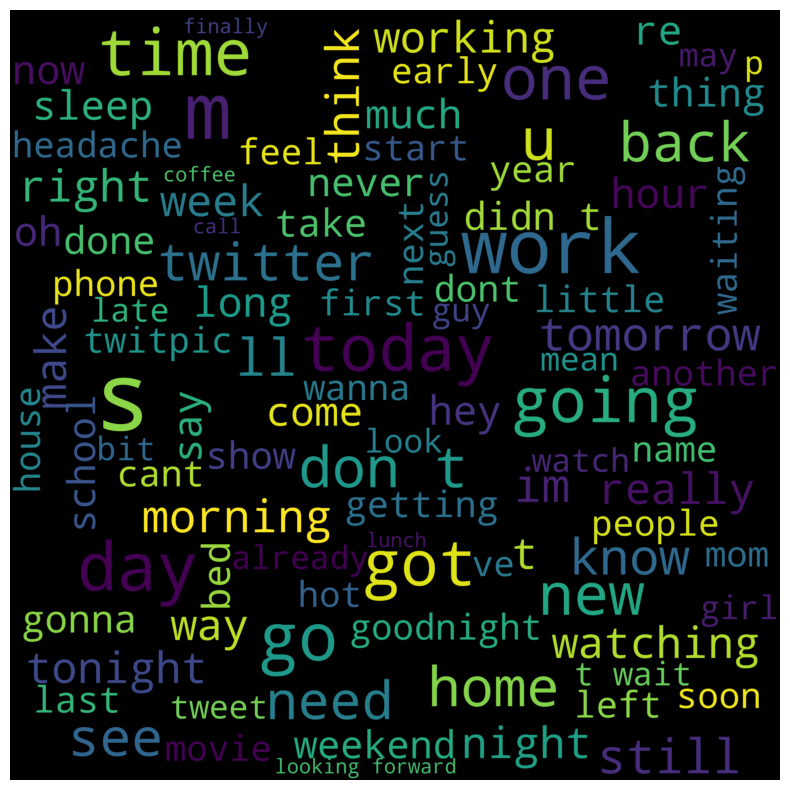

In [50]:
word_cloud_text = ' '.join(df[df["TwitterSentiment"] == "Neutral"]['TrainingTweet'])
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [51]:
# Create a binary sentiment column: 1 for Positive, 0 for Negative
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df['PosNegSentiment'] = (df['Positive_Sentiment'] > df['Negative_Sentiment']).astype(int)

# Features (X) and target (y)
X = df[['Positive_Sentiment', 'Negative_Sentiment']]
y = df['PosNegSentiment']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

X_train_prediction = log_reg.predict(X_train)
Xtraining_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score on the training data : ',Xtraining_data_accuracy)

Accuracy score on the training data :  0.9993241838220004


In [52]:
X_test_prediction = log_reg.predict(X_test)

Ytraining_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy score on the testing data : ',Ytraining_data_accuracy)

Accuracy score on the testing data :  0.9996361431170406


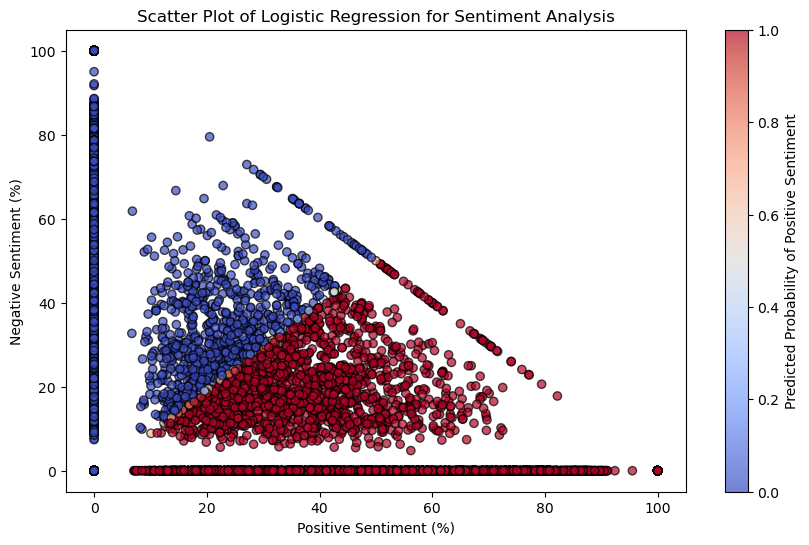

In [53]:

# Predict probabilities on the entire dataset
df['Predicted_Probability'] = log_reg.predict_proba(X)[:, 1]
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of actual sentiments
plt.scatter(df['Positive_Sentiment'], df['Negative_Sentiment'], c=df['Predicted_Probability'], cmap='coolwarm', edgecolor='k', alpha=0.7)

# Add color bar to show probability
plt.colorbar(label='Predicted Probability of Positive Sentiment')

# Labels and title
plt.xlabel('Positive Sentiment (%)')
plt.ylabel('Negative Sentiment (%)')
plt.title('Scatter Plot of Logistic Regression for Sentiment Analysis')

# Show plot
plt.show()

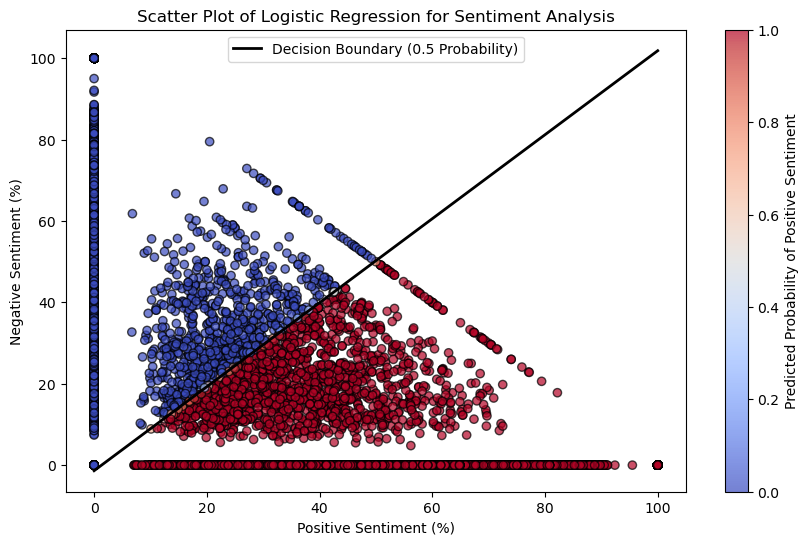

In [54]:
# Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of actual sentiments
plt.scatter(df['Positive_Sentiment'], df['Negative_Sentiment'], c=df['Predicted_Probability'], cmap='coolwarm', edgecolor='k', alpha=0.7)

# Add color bar to show probability
plt.colorbar(label='Predicted Probability of Positive Sentiment')

# Coefficients of the model
coef = log_reg.coef_[0]
intercept = log_reg.intercept_

# Define the range for the line (based on positive sentiment)
x_values = np.linspace(df['Positive_Sentiment'].min(), df['Positive_Sentiment'].max(), 100)

# Calculate y = (-intercept - coef[0]*x1) / coef[1] for the decision boundary
y_values = (-intercept - coef[0] * x_values) / coef[1]

# Plot the decision boundary as a solid line
plt.plot(x_values, y_values, color='black', linestyle='-', linewidth=2, label='Decision Boundary (0.5 Probability)')

# Labels and title
plt.xlabel('Positive Sentiment (%)')
plt.ylabel('Negative Sentiment (%)')
plt.title('Scatter Plot of Logistic Regression for Sentiment Analysis')

# Add legend
plt.legend()

# Show plot
plt.show()

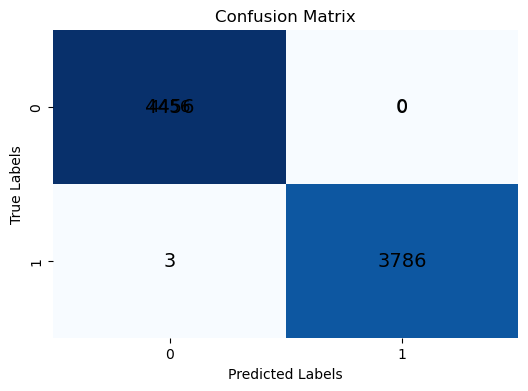

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, X_test_prediction)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            annot_kws={"size": 12, "color": "black"})  # Reduced font size

# Extract values
top_left = cm[0, 0]  # True Negatives
top_right = cm[0, 1] # False Positives
bottom_left = cm[1, 0] # False Negatives
bottom_right = cm[1, 1] # True Positives

# Get axis
ax = plt.gca()
# Annotate the positions with regular font and reduced size
ax.text(0.5, 0.5, f'{top_left}', ha='center', va='center', color='black', fontsize=14)
ax.text(1.5, 0.5, f'{top_right}', ha='center', va='center', color='black', fontsize=14)
ax.text(0.5, 1.5, f'{bottom_left}', ha='center', va='center', color='black', fontsize=14)
ax.text(1.5, 1.5, f'{bottom_right}', ha='center', va='center', color='black', fontsize=14)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()


The confusion matrix provides a detailed view of the model's classification performance. The matrix shows that the model accurately identified 4456 instances as negative (True Negatives) and 3786 instances as positive (True Positives). It made no mistakes in predicting negatives as positives (False Positives), indicating an ideal outcome with no false alarms. However, the model did misclassify 3 positive instances as negative (False Negatives), representing missed positive cases. Overall, the matrix highlights a highly effective model with minimal errors.